In [1]:
# Created on Monay 1 July 2019 by Claudio Bellani
# numerical experiments for my paper "Mechanics of good trade execution in the framework of linear temporary market impact"

In [1]:
import numpy as np

import pandas as pd

import pickle


import matplotlib.pyplot as plt

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import normalize

from mpl_toolkits.mplot3d import Axes3D 

from termcolor import colored

# from scipy import optimize

from numpy.polynomial.polynomial import*

In [3]:
font = {'size'   : 16}

plt.rc('font', **font)

In [2]:
import times_

from times_ import randomSign

import gte

In [5]:
# with open('midPrice_AAPL_2019-01-29','rb') as source:
#     midPrice_AAPL=pickle.load(source)

In [3]:
with open('param_gte_AAPL','rb') as source:
    param_AAPL=pickle.load(source)

In [4]:
with open('param_bridge_DE000','rb') as source:
    param_DE000=pickle.load(source)

In [5]:
incipit='bridge_30d10h22m'
show_terminationData=False

In [7]:
with open('variables_liquidation_{}'.format(incipit),'rb') as source:
    variables_liquidation=pickle.load(source)

In [6]:
with open('{}_variables_liquidation'.format(incipit),'rb') as source:
    variables_liquidation=pickle.load(source)

FileNotFoundError: [Errno 2] No such file or directory: 'bridge_30d10h22m_variables_liquidation'

In [8]:
with open('{}_priceProcess'.format(incipit),'rb') as source:
    priceProcess=pickle.load(source)

FileNotFoundError: [Errno 2] No such file or directory: 'bridge_30d10h22m_priceProcess'

In [11]:
with open('{}_inventoryTrajectory'.format(incipit),'rb') as source:
    trajectories=pickle.load(source)

In [12]:
if (show_terminationData):
    with open('{}_terminationData'.format(incipit),'rb') as source:
        terminationData=pickle.load(source)

In [9]:
variables_liquidation

,volatility,price_process,initial_inventory,liquidation_target,initial_price,coeff_marketImpact,coeff_riskAversion
0,1.817159,bridge,100000.0,0.0,103.893,0.006855,0.009341


In [14]:
initialInventory=variables_liquidation['initial_inventory']
liquidationTarget=variables_liquidation['liquidation_target']
date='2019-01-31'
initialPrice=variables_liquidation['initial_price']
# terminalValue=0.975*initialPrice
asset_class='equity'
stochastic_process=variables_liquidation['price_process']
volatility=variables_liquidation['volatility']
coeffMarketImpact=variables_liquidation['coeff_marketImpact']
coeffRiskAversion=variables_liquidation['coeff_riskAversion']

initialTime=0.0
timeHorizon=1.0
timeHorizon_price=2.0
hurst_exponent=0.75

line_liqTarget.shape=(27852, 1)


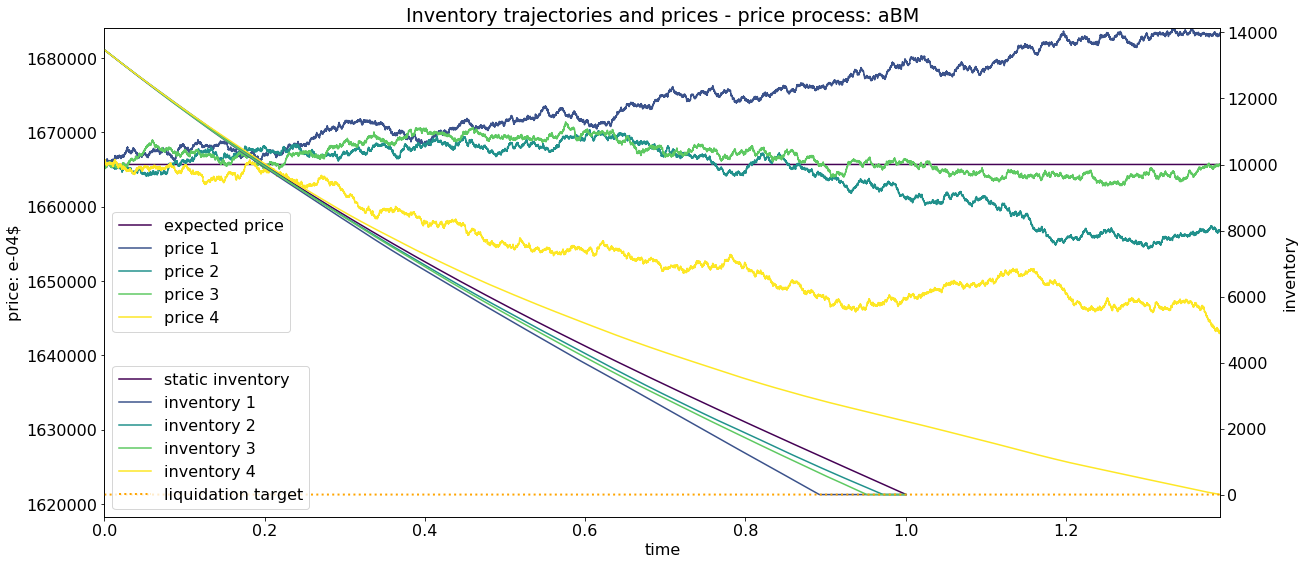

In [15]:
fig = plt.figure(figsize=(20, 9))
cmap = plt.get_cmap('viridis')
ax_price= fig.add_subplot(111)

if not (asset_class=='bond'):
    priceProcess.pricePaths.loc[:trajectories.index[-1]].plot(ax=ax_price,colormap=cmap)
    ylim=[0.985005*np.amin(priceProcess.pricePaths.loc[:trajectories.index[-1]].values),
      np.amax(priceProcess.pricePaths.loc[:trajectories.index[-1]].values)]
else:
    priceProcess.pricePaths.plot(ax=ax_price,colormap=cmap)
    ylim=[0.9*np.amin(priceProcess.pricePaths.values),
          np.amax(priceProcess.pricePaths.values)]

ax_price.set_ylim(ylim)
ax_price.set_xlabel('time')
ax_price.set_ylabel('price: e-04$')





ax_inventory=ax_price.twinx()

trajectories.plot(ax=ax_inventory,colormap=cmap)
line_liqTarget=liquidationTarget*np.ones((len(trajectories),1))
print('line_liqTarget.shape={}'.format(line_liqTarget.shape))
if not (asset_class=='bond'):
    ax_inventory.plot(trajectories.index,
                      line_liqTarget,
                      color='orange',linewidth=2.0,label='liquidation target',ls=':')
else:
    ax_inventory.plot(priceProcess.pricePaths.index,
                      liquidationTarget*np.ones(len(priceProcess.pricePaths)),
                      color='orange',linewidth=2.0,label='liquidation target',ls=':')
ax_inventory.set_ylabel('inventory')
ax_inventory.set_xlabel('time')
ax_inventory.legend(loc=3)
ax_price.legend(loc=6)

plt.title('Inventory trajectories and prices - price process: {}'.format(stochastic_process))
plt.show()

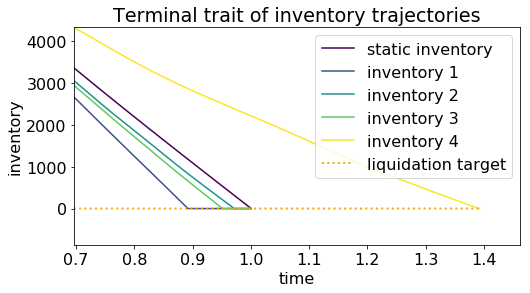

In [16]:
fig = plt.figure(figsize=(8, 4))
cmap = plt.get_cmap('viridis')
ax= fig.add_subplot(111)


trajectories.plot(ax=ax,colormap=cmap)

ax.plot(trajectories.index,
        line_liqTarget,
        color='orange',linewidth=2.0,label='liquidation target',ls=':')

xlim=[0.5*trajectories.index[-1],1.05*trajectories.index[-1]]
h=np.amax(trajectories.loc[xlim[0]:xlim[1]].max().values)
ylim=[-0.20*h, h]
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('inventory')
ax.set_xlabel('time')
ax.legend()


plt.title('Terminal trait of inventory trajectories')
plt.show()

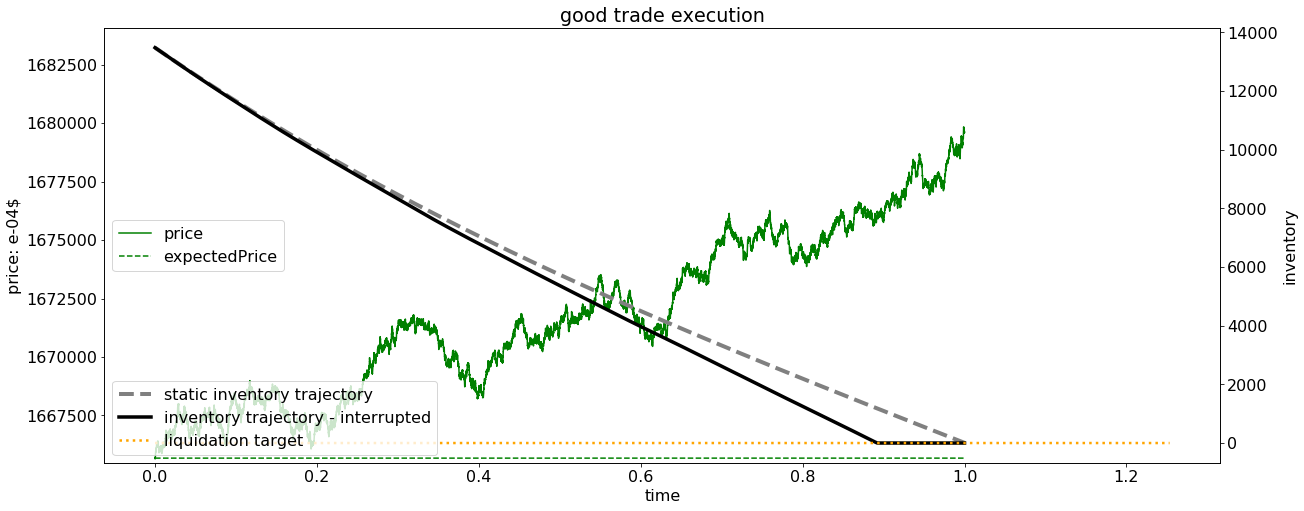

In [17]:
fig = plt.figure(figsize=(20, 8))

ax_price= fig.add_subplot(111)

ax_price.plot(priceProcess.pricePath_high.loc[:timeHorizon],
        label='price',color='green')
# ax_price.plot(timePartition,executionPrice,
#         label='execution price',color='red')
ax_price.plot(priceProcess.expectedPricePath.loc[:timeHorizon],
        label='expectedPrice',color='green',ls='--')
ax_price.set_xlabel('time')
ax_price.set_ylabel('price: e-04$')
ylim=[0.99990*np.amin(priceProcess.pricePath_high.loc[:trajectories.index[-1]].values),
      np.amax(priceProcess.pricePath_high.loc[:trajectories.index[-1]].values)]
ax_price.set_ylim(ylim)

ax_inventory=ax_price.twinx()

ax_inventory.plot(trajectories['static inventory'],
        label='static inventory trajectory',color='grey',ls='--',linewidth=4)
ax_inventory.plot(trajectories['inventory 1'],
        label='inventory trajectory - interrupted',color='black',linewidth=3.5)
ax_inventory.plot(0.90*trajectories['inventory 1'].index,
                  liquidationTarget*np.ones_like(trajectories['inventory 1'].values),
                  color='orange',linewidth=2.5,label='liquidation target',ls=':')
# if (is_liquidationTerminated):
#     ax_inventory.scatter(terminationTime,liquidationTarget,label='termination time',linewidth=1,facecolor='r',edgecolor='r')
            
ax_inventory.set_ylabel('inventory')
ax_inventory.set_xlabel('time')
ax_inventory.legend(loc=3)
ax_price.legend(loc=6)

plt.title('good trade execution')
plt.show()

In [33]:
terminationData.liquidation_error=100*terminationData.liquidation_error/initialInventory
terminationData.describe()


,completion_time,liquidation_error
count,10000.000000,10000.000000
mean,1.016094,0.076765
std,0.100560,6.867959
min,0.782939,-25.438195
25%,0.947597,-4.660040
50%,1.000400,0.032330
75%,1.065103,4.722920
max,2.260270,24.424661


In [34]:
latex_ter=terminationData.describe().to_latex()

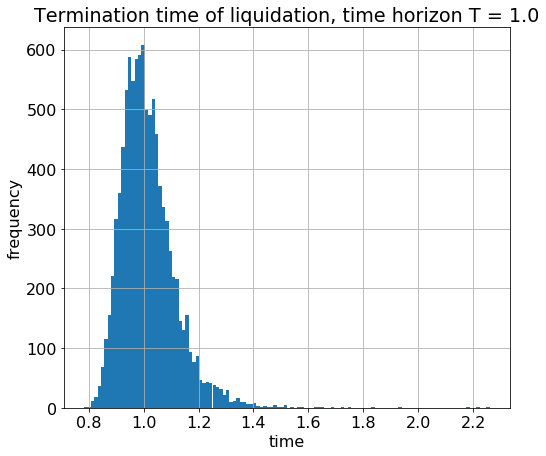

In [29]:
fig = plt.figure(figsize=(8, 7))

ax= fig.add_subplot(111)

terminationData.completion_time.hist(ax=ax,bins=120)
ax.set_title('Termination time of liquidation, time horizon T = {:.1f}'.format(timeHorizon))
ax.set_xlabel('time')
ax.set_ylabel('frequency')
plt.show()

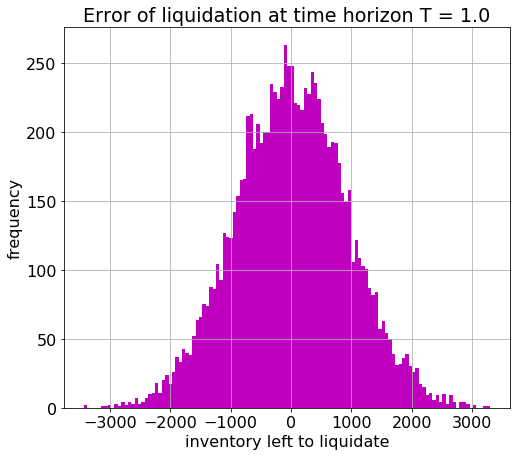

In [30]:
fig = plt.figure(figsize=(8, 7))

ax= fig.add_subplot(111)

terminationData.liquidation_error.hist(ax=ax,bins=120,color='m')
ax.set_title('Error of liquidation at time horizon T = {:.1f}'.format(timeHorizon))
ax.set_xlabel('inventory left to liquidate')
ax.set_ylabel('frequency')
plt.show()

In [32]:
variables_liquidation


{'initial_inventory': 13475.34461024349,
 'liquidation_target': 0.0,
 'initial_price': array([1665671.13402062]),
 'price_process': 'aBM',
 'volatility': 6375.542451120962,
 'coeff_marketImpact': 1.5,
 'coeff_riskAversion': 1.75}

In [35]:
latex_ter


'\\begin{tabular}{lrr}\n\\toprule\n{} &  completion\\_time &  liquidation\\_error \\\\\n\\midrule\ncount &     10000.000000 &       10000.000000 \\\\\nmean  &         1.016094 &           0.076765 \\\\\nstd   &         0.100560 &           6.867959 \\\\\nmin   &         0.782939 &         -25.438195 \\\\\n25\\%   &         0.947597 &          -4.660040 \\\\\n50\\%   &         1.000400 &           0.032330 \\\\\n75\\%   &         1.065103 &           4.722920 \\\\\nmax   &         2.260270 &          24.424661 \\\\\n\\bottomrule\n\\end{tabular}\n'